In [1]:
import gym

import mdptoolbox, mdptoolbox.example

import time

import pandas as pd 
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt 

from hiive import mdptoolbox
import hiive.mdptoolbox.example
import hiive.mdptoolbox.mdp

from itertools import accumulate


### Forest Problem (Non GridWorld Example)

- Creates transition probability P, size (Action X State X State)
- Creates Reward Matrix R, size (State X Action)
- Action is either WAIT (Action = 0) or CUT (Action = 1). There is some probability p that the fire burns the forest. 
- The states of the forest are the ages of how old the forest is since last cut or burn, where S = {0, 1, ..., S-1}

- S: The number of states, the number of years old the forest can be 
- r1: the reward when the forest is in its oldest state and action WAIT is performed 
- r2: the reward whne the forest is in its oldest state and action CUT is performed
- p: the probability that a wild fire occurs 

State Size 100

In [69]:
P, R = hiive.mdptoolbox.example.forest(S = 100, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()
#print(vi.policy)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()
#print(ql.policy)

[{'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 14.1448095376563, 'Time': 0.0024139881134033203, 'Max V': 23.172433847048566, 'Mean V': 5.203547542890375, 'Iteration': 1}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 10.904809537656298, 'Time': 0.004152059555053711, 'Max V': 23.172433847048566, 'Mean V': 5.344995638266938, 'Iteration': 2}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 8.2804095376563, 'Time': 0.005589962005615234, 'Max V': 23.172433847048566, 'Mean V': 5.454043733643501, 'Iteration': 3}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 6.1546455376563, 'Time': 0.006752967834472656, 'Max V': 23.172433847048566, 'Mean V': 5.536847829020064, 'Iteration': 4}, {'State': None, 'Action': None, 'Reward': 23.172433847048566, 'Error': 4.4327766976562994, 'Time': 0.007996082305908203, 'Max V': 23.172433847048566, 'Mean V': 5.598394284396627, 'Iteration': 5}, {'State': None, 'Action': 

In [70]:
#print(P[0, :, :])

In [71]:
# Take action 0, while in State 0, and end up with these transition probabilities to these states: 10% to 0, 90% to state 1
P[0, 0, :]

array([0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

Policy Iteration Final Iteration

In [72]:
pi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 23.172433847048566,
 'Error': 1.7763568394002505e-15,
 'Time': 0.014250993728637695,
 'Max V': 23.172433847048566,
 'Mean V': 5.704639509766346,
 'Iteration': 10}

In [73]:
vi_result

[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 6.67572021484375e-05,
  'Max V': 4.0,
  'Mean V': 1.02,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 7.24,
  'Error': 3.24,
  'Time': 0.00013899803161621094,
  'Max V': 7.24,
  'Mean V': 1.0829,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 9.9373,
  'Error': 2.6244,
  'Time': 0.0002498626708984375,
  'Max V': 9.9373,
  'Mean V': 1.8543879999999995,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 12.128674000000002,
  'Error': 2.1257640000000015,
  'Time': 0.0003337860107421875,
  'Max V': 12.128674000000002,
  'Mean V': 1.9937819699999997,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 13.957421530000001,
  'Error': 1.721868840000001,
  'Time': 0.00045490264892578125,
  'Max V': 13.957421530000001,
  'Mean V': 2.5784792630999998,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 15.448326111400002,
  'Error': 1.3947

Value Iteration Final Iteration

In [74]:
vi_result[-1]

{'State': None,
 'Action': None,
 'Reward': 23.089675091923866,
 'Error': 0.0013319585461291084,
 'Time': 0.0035707950592041016,
 'Max V': 23.089675091923866,
 'Mean V': 5.626418022627985,
 'Iteration': 39}

Q Learning Final Iteration

In [75]:
ql_result[-1]

{'State': 78,
 'Action': 0,
 'Reward': 0.0,
 'Error': 1.3971671949857447e-06,
 'Time': 0.36748600006103516,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.9,
 'Max V': 2.835677526959996,
 'Mean V': 0.06636136236041618,
 'Iteration': 10000}

In [76]:
def chart_reward_iter(results, title):
    iter_list = []
    result_list = []

    for i in range(0, len(results)):
        iter_list.append(results[i]['Iteration'])
        result_list.append(results[i]['Reward'])

    plt.plot(iter_list, result_list)
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title(title)
    plt.show()

In [98]:
def compare_reward(pi, vi, num_states, discount_rate, title):
    
    pi_iter_list = []
    pi_reward_list = []
    pi_time_list = []
    vi_iter_list = []
    vi_reward_list = []
    vi_time_list = []
    
    for i in range(0, len(pi)):
        pi_iter_list.append(pi[i]['Iteration'])
        #pi_reward_list.append(pi[i]['Reward'])
        pi_reward_list.append(pi[i]['Mean V'])
        pi_time_list.append(pi[i]['Time'])
    pi_cumsum_list = list(accumulate(pi_time_list))
    
    for i in range(0, len(vi)):
        vi_iter_list.append(vi[i]['Iteration'])
        #vi_reward_list.append(vi[i]['Reward'])
        vi_reward_list.append(vi[i]['Mean V'])
        vi_time_list.append(vi[i]['Time'])
    vi_cumsum_list = list(accumulate(vi_time_list))
    
    plt.clf()
    plt.plot(pi_iter_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_iter_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.title("The effect of Iteration on Reward, Policy and Value Iteration \n with States: " + \
              str(num_states) + " Discount Rate: " + str(discount_rate) + "\n for " + title)
    plt.legend()
    plt.show()
    
    plt.clf()
    plt.plot(pi_cumsum_list, pi_reward_list, label = "Policy Iteration")
    plt.plot(vi_cumsum_list, vi_reward_list, label = "Value Iteration")
    plt.xlabel("Cumulative Time")
    plt.ylabel("Reward")
    plt.title("The effect of Time on Reward, Policy and Value Iteration \n with States: " +\
              str(num_states) + " Discount Rate: " + str(discount_rate) + "\n for " + title)
    plt.legend()
    plt.show()
    

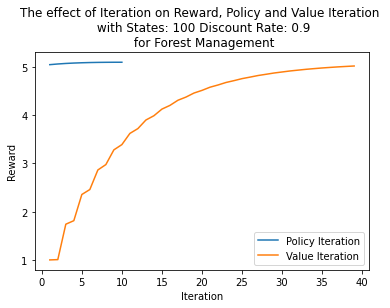

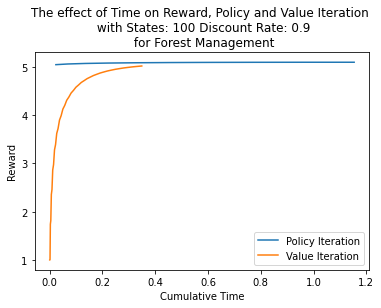

In [99]:
compare_reward(pi_result, vi_result, 100, .90, "Forest Management")

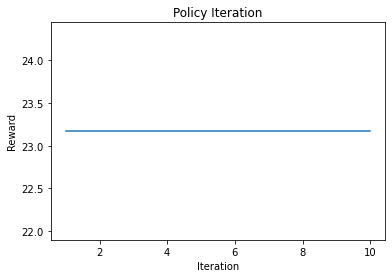

In [79]:
chart_reward_iter(pi_result, "Policy Iteration")

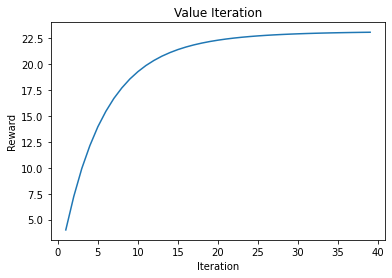

In [80]:
chart_reward_iter(vi_result, "Value Iteration")

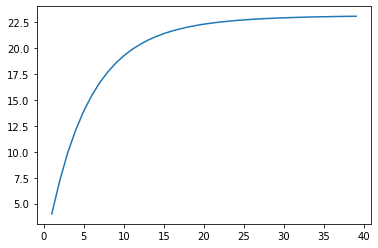

In [81]:
iter_list = []
result_list = []

for i in range(0, len(vi_result)):
    iter_list.append(vi_result[i]['Iteration'])
    result_list.append(vi_result[i]['Reward'])
    
plt.plot(iter_list, result_list)
plt.show()

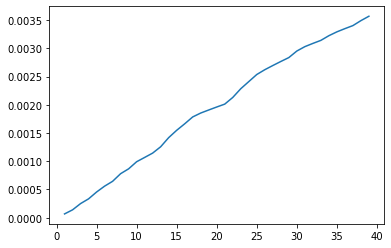

In [82]:
iter_list = []
result_list = []

for i in range(0, len(vi_result)):
    iter_list.append(vi_result[i]['Iteration'])
    result_list.append(vi_result[i]['Time'])
    
plt.plot(iter_list, result_list)
plt.show()

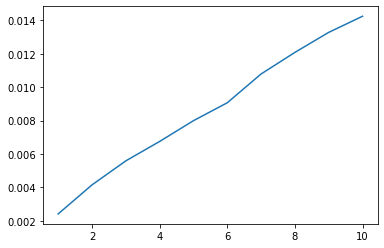

In [83]:
iter_list = []
result_list = []

for i in range(0, len(pi_result)):
    iter_list.append(pi_result[i]['Iteration'])
    result_list.append(pi_result[i]['Time'])
    
plt.plot(iter_list, result_list)
plt.show()

#### How many iterations does it take to converge? 


In [84]:
print("Policy Iteration", pi_result[-1]['Iteration'])
print("Value Iteration", vi_result[-1]['Iteration'])

Policy Iteration 10
Value Iteration 39


#### Which one converges faster?

In [85]:
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))

time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))


Policy Iteration Time: 0.08639025688171387
Value Iteration Time: 0.0755612850189209


#### How did you choose to define convergence?

The defaults 

#### Do they converge to the same answer?

In [86]:
vi.policy == pi.policy

True

#### Which converged to a higher reward?

In [87]:
print("Policy Iteration", pi_result[-1]['Reward'])
print("Value Iteration", vi_result[-1]['Reward'])

Policy Iteration 23.172433847048566
Value Iteration 23.089675091923866


#### How did the number of states affect things, if at all?

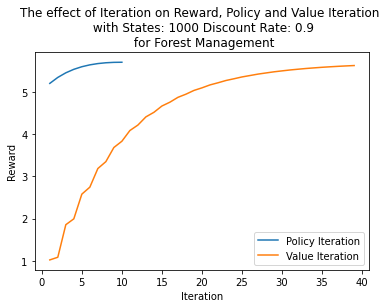

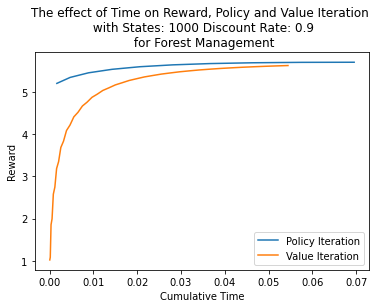

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 0.06952738761901855
Value Iteration Time: 0.054422616958618164
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 5.704639509766346
Value Iteration: 5.626418022627985
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
How did the number of states affect things, if at all?


In [104]:
P, R = hiive.mdptoolbox.example.forest(S = 100, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

compare_reward(pi_result, vi_result, 1000, 0.9, "Forest Management")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

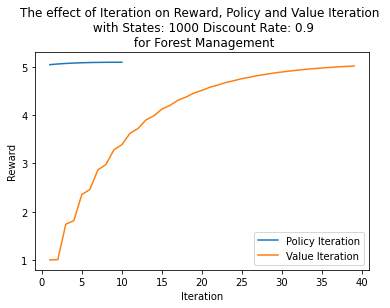

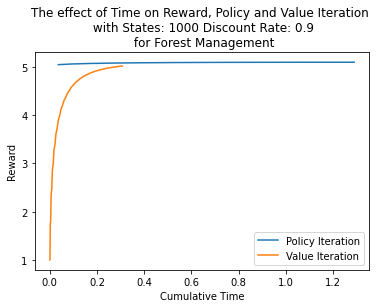

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 1.2885611057281494
Value Iteration Time: 0.30734872817993164
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 5.095325829429674
Value Iteration: 5.017559559264563
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
How did the number of states affect things, if at all?


In [105]:
P, R = hiive.mdptoolbox.example.forest(S = 1000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

compare_reward(pi_result, vi_result, 1000, 0.9, "Forest Management")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

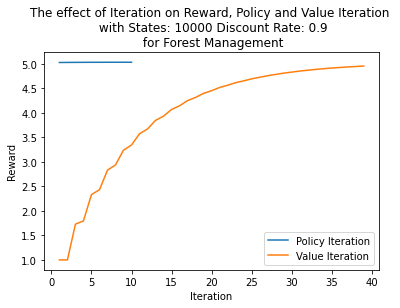

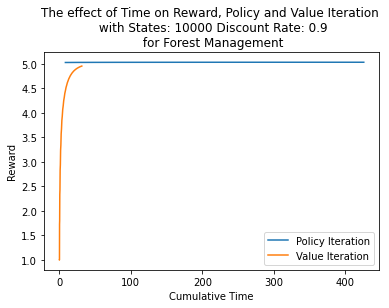

How many iterations does it take to converge?
Policy Iteration: 10
Value Iteration: 39
Which one converges faster? Why?
Policy Iteration Time: 425.7980098724365
Value Iteration Time: 31.34449005126953
Do they converge to the same answer?
True
To what Mean Value do they converge?
Policy Iteration: 5.0343944613960065
Value Iteration: 4.956673712928221
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
To what Max Value do they converge?
Policy Iteration: 23.172433847048566
Value Iteration: 23.089675091923866
How did the number of states affect things, if at all?


In [106]:
P, R = hiive.mdptoolbox.example.forest(S = 10000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R,0.9)
pi_result = pi.run()

vi = hiive.mdptoolbox.mdp.ValueIteration(P,R,0.9)
vi_result = vi.run()

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

compare_reward(pi_result, vi_result, 10000, 0.9, "Forest Management")

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])


print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("To what Mean Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Mean V'])
print("Value Iteration:", vi_result[-1]['Mean V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Max V'])
print("Value Iteration:", vi_result[-1]['Max V'])

print("To what Max Value do they converge?")
print("Policy Iteration:", pi_result[-1]['Reward'])
print("Value Iteration:", vi_result[-1]['Reward'])

print("How did the number of states affect things, if at all?")

In [ ]:
P, R = hiive.mdptoolbox.example.forest(S = 1000, r1 = 4, r2 = 2, p = 0.1, is_sparse = False)

learning_rates = np.arange(0.90, 1.0, 0.01)

pi_LR_dict = {
    'LR' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Time': [],
    'Error':[]
}
vi_LR_dict = {
    'LR' : [],
    'Iteration' : [],
    'rewards' : [],
    'Mean V': [],
    'Time': [],
    'Error':[]
}
for LR in learning_rates:
    
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P,R, LR)
    pi_result = pi.run()
   
    vi = hiive.mdptoolbox.mdp.ValueIteration(P,R, LR)
    vi_result = vi.run()
    
    ql = hiive.mdptoolbox.mdp.QLearning(P, R, LR)
    ql_result = ql.run()
    
    pi_iter_list = []
    pi_reward_list = []
    pi_mean_v_list = []
    pi_error_list = []
    pi_time_list = []
    
    vi_iter_list = []
    vi_reward_list = []
    vi_mean_v_list = []
    vi_error_list = []
    vi_time_list = []

    for i in range(0, len(pi_result)):
        pi_iter_list.append(pi_result[i]['Iteration'])
        pi_reward_list.append(pi_result[i]['Reward'])
        pi_mean_v_list.append(pi_result[i]['Mean V'])
        pi_error_list.append(pi_result[i]['Error'])
        pi_time_list.append(pi_result[i]['Time'])
        
    
    for i in range(0, len(vi_result)):
        vi_iter_list.append(vi_result[i]['Iteration'])
        vi_reward_list.append(vi_result[i]['Reward'])
        vi_mean_v_list.append(vi_result[i]['Mean V'])
        vi_error_list.append(vi_result[i]['Error'])
        vi_time_list.append(vi_result[i]['Time'])
    
    pi_LR_dict['LR'].append(LR)
    pi_LR_dict['Iteration'].append(pi_iter_list)
    pi_LR_dict['rewards'].append(pi_reward_list)
    pi_LR_dict['Mean V'].append(pi_mean_v_list)
    pi_LR_dict['Error'].append(pi_error_list)
    pi_LR_dict['Time'].append(pi_time_list)
    
    
    vi_LR_dict['LR'].append(LR)
    vi_LR_dict['Iteration'].append(vi_iter_list)
    vi_LR_dict['rewards'].append(vi_reward_list)
    vi_LR_dict['Mean V'].append(vi_mean_v_list)
    vi_LR_dict['Error'].append(vi_error_list)
    vi_LR_dict['Time'].append(vi_time_list)
    
    

Policy Iteration

In [24]:
def plot_parameter_tuning(results, hyperparam, x_var, y_var):
    
    for i in range(0, len(results[hyperparam])):
        label = results[hyperparam][i]
        label = np.around(label, 2)
        label = '{:.1%}'.format(label)
        
        x = results[x_var][i]
        y = results[y_var][i]
        plt.plot(x, y, label = label)

    plt.title("The Effect of " + hyperparam + " on " + y_var + " over " + x_var)
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(title = 'Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
    plt.show()


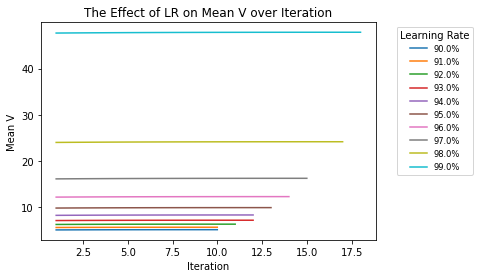

In [25]:
plot_parameter_tuning(pi_LR_dict, "LR", "Iteration", "Mean V")

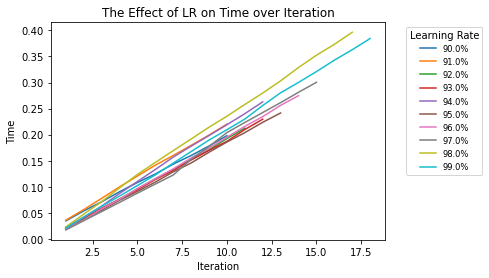

In [26]:
plot_parameter_tuning(pi_LR_dict, "LR", "Iteration", "Time")

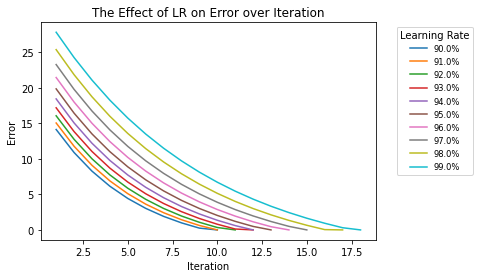

In [27]:
plot_parameter_tuning(pi_LR_dict, "LR", "Iteration", "Error")

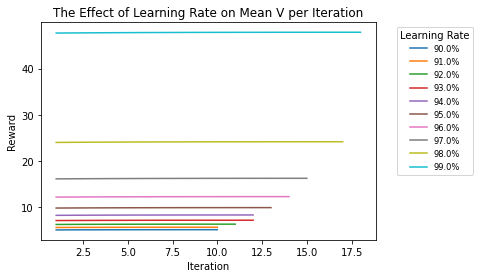

In [28]:
for i in range(0, len(pi_LR_dict['LR'])):
    label = vi_LR_dict['LR'][i]
    label = np.around(label, 2)
    label = '{:.1%}'.format(label)
    x = pi_LR_dict['Iteration'][i]
    y = pi_LR_dict['Mean V'][i]
    plt.plot(x, y, label = label)
    
plt.title("The Effect of Learning Rate on Mean V per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.legend(title = 'Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()
    

Value Iteration

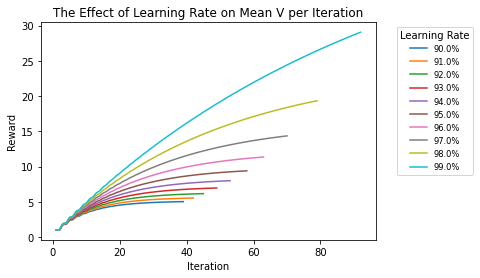

In [29]:
vi_LR_dict

for i in range(0, len(vi_LR_dict['LR'])):
    label = vi_LR_dict['LR'][i]
    label = np.around(label, 2)
    label = '{:.1%}'.format(label)
    x = vi_LR_dict['Iteration'][i]
    y = vi_LR_dict['Mean V'][i]
    plt.plot(x, y, label = label)
    
plt.title("The Effect of Learning Rate on Mean V per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.legend(title = 'Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()    

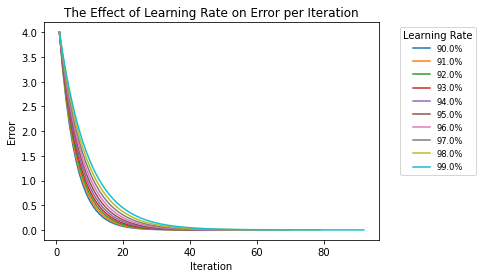

In [30]:
for i in range(0, len(vi_LR_dict['LR'])):
    label = vi_LR_dict['LR'][i]
    label = np.around(label, 2)
    label = '{:.1%}'.format(label)
    x = vi_LR_dict['Iteration'][i]
    y = vi_LR_dict['Error'][i]
    plt.plot(x, y, label = label)
    
plt.title("The Effect of Learning Rate on Error per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend(title = 'Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()
    

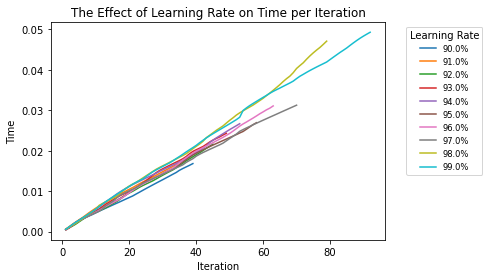

In [31]:
for i in range(0, len(vi_LR_dict['LR'])):
    label = vi_LR_dict['LR'][i]
    label = np.around(label, 2)
    label = '{:.1%}'.format(label)
    x = vi_LR_dict['Iteration'][i]
    y = vi_LR_dict['Time'][i]
    plt.plot(x, y, label = label)
    
plt.title("The Effect of Learning Rate on Time per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Time")
plt.legend(title = 'Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize='small', fancybox=True)
plt.show()
    

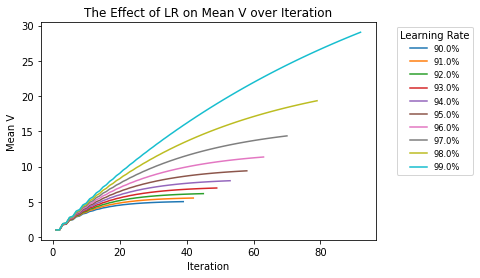

In [32]:
plot_parameter_tuning(vi_LR_dict, "LR", "Iteration", "Mean V")

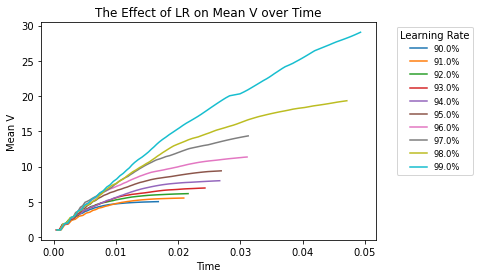

In [67]:
plot_parameter_tuning(vi_LR_dict, "LR", "Time", "Mean V")

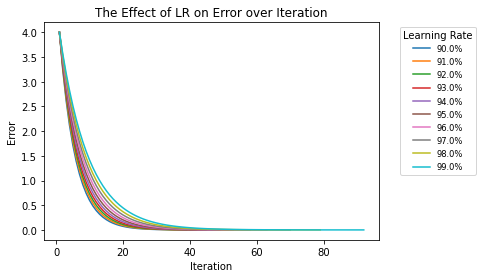

In [33]:
plot_parameter_tuning(vi_LR_dict, "LR", "Iteration", "Error")

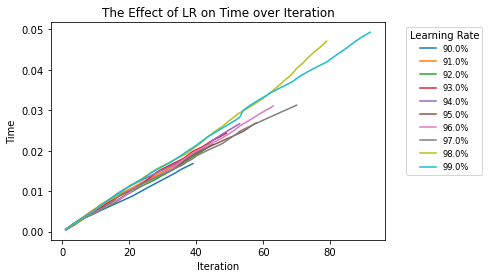

In [34]:
plot_parameter_tuning(vi_LR_dict, "LR", "Iteration", "Time")

### Frozen Lake (Grid World Problem)

Actions: 4
Size: 16


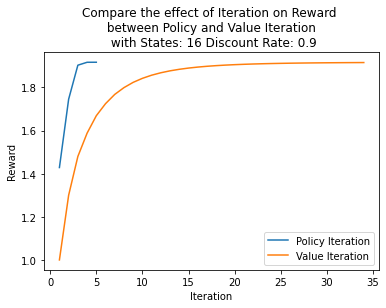

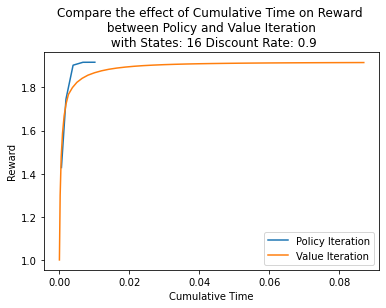

How many iterations does it take to converge?
Policy Iteration: 5
Value Iteration: 34
Which one converges faster? Why?
Policy Iteration Time: 0.010210275650024414
Value Iteration Time: 0.08696532249450684
Do they converge to the same answer?
True
How did the number of states affect things, if at all?
False


In [66]:
env = gym.make("FrozenLake-v0", is_slippery = True)

#env.reset()
#env.render()
env = env.unwrapped

n_actions = env.action_space.n
print("Actions:",n_actions)

n_states = env.observation_space.n
print("Size:",n_states)

frozen_dict = env.P

P_array = np.zeros((n_actions, n_states, n_states))
R_array = np.zeros((n_states, n_actions))

# UNPACK P and R From GYM
for key, val in frozen_dict.items():
    state = key
    for k, v in val.items():
        action = k
        for i in range(0, len(v)):
            prob = v[i][0]
            s_prime = v[i][1]
            reward = v[i][2]
            done = v[i][3]
            P_array[action, state, s_prime] += prob
            R_array[state, action] += reward
            

pi = hiive.mdptoolbox.mdp.PolicyIteration(P_array, R_array, 0.9)
pi_result = pi.run()
pi.setVerbose()
#print(pi.policy)
#print(pi.V)
#print(pi_result)

vi = hiive.mdptoolbox.mdp.ValueIteration(P_array, R_array, 0.9)
vi_result = vi.run()
#print(vi_result)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, 0.9)
ql_result = ql.run()

####################

compare_reward(pi_result, vi_result, n_states, 0.9)

print("How many iterations does it take to converge?")
print("Policy Iteration:", pi_result[-1]['Iteration'])
print("Value Iteration:", vi_result[-1]['Iteration'])

print("Which one converges faster? Why?")
time_list = []
for i in range(0, len(pi_result)):
    time_list.append(pi_result[i]['Time']) 
print("Policy Iteration Time:", sum(time_list))
time_list = []
for i in range(0, len(vi_result)):
    time_list.append(vi_result[i]['Time'])
print("Value Iteration Time:", sum(time_list))

print("Do they converge to the same answer?")
print(pi.policy == vi.policy)

print("How did the number of states affect things, if at all?")


In [64]:
# this is how to change the size: 
env = gym.make("FrozenLake-v0", map_name = "8x8", is_slippery=True)

#env = gym.make("FrozenLake-v0", map_name = "4x4")

env.P

#env.update_probability_matrix(0,0, 4)

env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
